In [1]:
import numpy as np
import matplotlib.pyplot as plt
doplot=2
%matplotlib nbagg
import logging
%load_ext autoreload
%autoreload 2
#logging.basicConfig(level=logging.DEBUG)
log = logging.getLogger('JMK')
log.setLevel(logging.DEBUG)
log.info('Hi')
log.debug('BooWho')
def symclim(pcm):
    cl = pcm.get_clim()
    m = np.max(np.abs(cl))
    pcm.set_clim([-m,m])


/Users/jklymak/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
INFO:JMK:Hi
DEBUG:JMK:BooWho


In [71]:
c1=3.72e-3*2663/np.pi
omega = np.pi*2./3600./12.4
f=1e-4

k = np.sqrt((omega**2-f**2)/c1**2)
print c1,np.pi*2./k/1e3

k = np.pi*2./200.e3
c1 = np.sqrt((omega**2-f**2)/k**2)
H = c1*np.pi/3.72e-3
print H,c1

3.1532923241 200.024157314
2662.67838421 3.15291149473


3010 3010


<IPython.core.display.Javascript object>


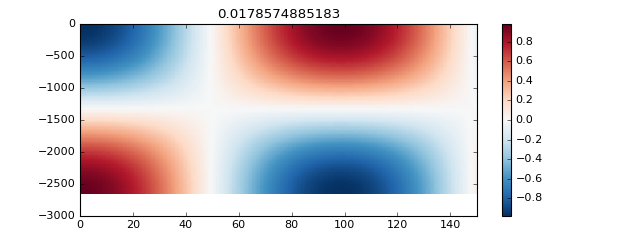

In [14]:
import SolveRefl as sr
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(12,figsize=(8,3))
fig.clf()
if 1:
    I =150
    ax=fig.add_subplot(1,1,1)
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+2662.67
    f = 1.e-4
    omega = np.pi*2./12.4/3600.
    ind = np.where(Nsq0<omega**2)[0]

    x,z,H,P,E1,psi,alpha,beta,G4,=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=xx,H=hh,J=130,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r')
    symclim(pcm)
    #                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
    fig.colorbar(pcm,ax=ax)
    ax.set_title(offset)
    ax.set_xlim([0.,np.max(x)/1e3])
#fig.canvas.manager.show()



## Test resolution

3010 3010


<IPython.core.display.Javascript object>


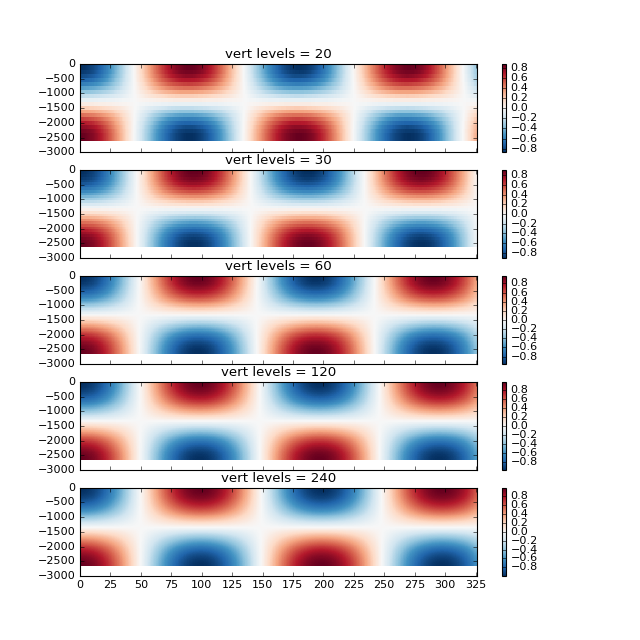

<IPython.core.display.Javascript object>


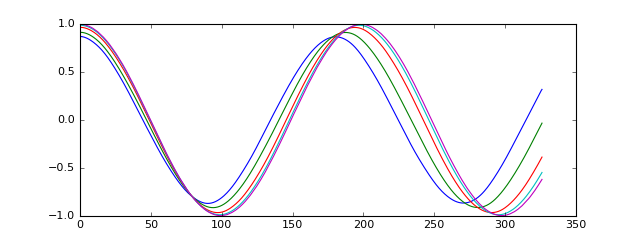

20
30
60
120
240


In [15]:
import SolveRefl as sr
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(13,figsize=(8,8))
fig2=plt.figure(14,figsize=(8,3))
ax2=fig2.add_subplot(1,1,1)
Js = [20,30,60,120,240]
for nn,J in enumerate(Js):
    print J
    I =326
    ax=fig.add_subplot(5,1,nn+1)
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+2662.67
    f = 1.e-4
    omega = np.pi*2./12.4/3600.
    ind = np.where(Nsq0<omega**2)[0]

    x,z,H,P,E1,psi,alpha,beta,G4,=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=xx,H=hh,J=J,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r')
    symclim(pcm)
    #                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
    fig.colorbar(pcm,ax=ax)
    ax.set_title('vert levels = %d'%J)
    ax.set_xticks(np.arange(0,500.,25.))
    if nn<4:
        ax.set_xticklabels('')
    ax.set_xlim([0.,np.max(x)/1e3])
    
    ax2.plot(x/1e3,P[0,:]-offset)
#fig.canvas.manager.show()


So, from the above, we see the effect of too few vertical levels.  The theoretical wavelength is 200 km, but the lower resolution versions give a shorter wavelength.  The same effect can be found by considering vertical modes from the `vertmodes.vertModesP` (below).  The p solver tends to underestimate $c$ and hence the wavelength of internal waves $\lambda$.  The effect is to make the transmitting BC poor because the incoming waves are out of phase with what the reflecting BC expects.  

In [9]:
from vertmodes import vertModesP,vertModes

k = np.pi*2./200e3
c1 = np.sqrt((omega**2-f**2)/k**2)
print c1
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
Js = [20,40,80,160,320,640,1280]
for nn,J in enumerate(Js):
    zmid = np.linspace(0.,2662.67,J+1)
    dz = np.median(np.diff(zmid))
    zmid = zmid[:-1]+dz/2.
    N2 = np.interp(zmid,z0,Nsq0)
    # P solver
    psi,phi,ce,zphi=vertModesP(N2,dz)
    # Wsolver
    psi,phi,ceW,zphi=vertModes(N2,dz)
    print('%04d %06.3f %06.3f %06.3f %06.3f'%( J,ce[0],ce[0]/c1*100.,ceW[0],ceW[0]/c1*100.))

3.15291149473
0020 02.686 85.204 03.156 100.103
0040 02.918 92.536 03.154 100.025
0080 03.035 96.257 03.153 100.006
0160 03.094 98.126 03.153 100.001
0320 03.123 99.063 03.153 100.000
0640 03.138 99.531 03.153 100.000
1280 03.146 99.765 03.153 100.000


/Users/jklymak/python/lib/vertmodes.py:178: RuntimeWarning: invalid value encountered in sqrt
  ce = 1./np.sqrt(ce)


## Test versus Qiang's solution.

This won't be perfect, as he solves for a velocity potential.


In [17]:
I=256; J=128*2;
omega=1.45e-4; f=1.06e-4; # tidal frequency and Coriolis parameter
Nsq=0.01**2; # buoyance

x=np.linspace(0e3,80e3,I); dx=x[1]-x[0];
 
# geometry/topography
H=225-75*np.tanh(0.1e-3*(x-30e3)); #H=300+x*0;
if 0:
    H = 0*H+225.
    ind = np.where((x>30.e3)&(x<50.e3))[0]
    H[ind] = np.linspace(225,225-75,len(ind))
    H[ind[-1]:]=225-75
#H=225.0 - 50.0*np.exp(-((x-40.e3)/1.e3)**2)

z0 = np.linspace(0,np.max(H),500)
Nsq0 = z0*0.+Nsq
x,z,H,P,E1,psi,alpha,beta,G4,=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=x,H=H,J=J,z0=z0,Nsq0=Nsq0,)
  

(-15957106.3714+211454736.662j)
0.00390625
[ 1.   2.   2.5  2. ]
(256,)


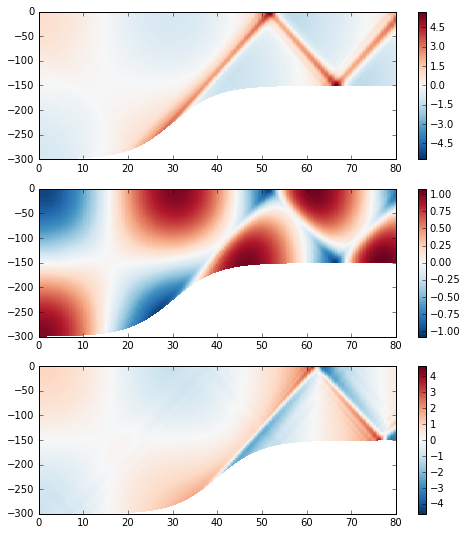

In [18]:
  
fig,axs=plt.subplots(3,1,figsize=(8,9))
#P=np.real(P);
offset=np.mean(P[:,0])
print offset
dz=z[1]-z[0]
print dz
print np.gradient([1.,2.,5.,7.])
dx = x[1]-x[0]
gP = np.gradient(P)
Hx = np.gradient(H,x[1]-x[0])

print np.shape(z)
dpDX = gP[1]/dx - z[:,np.newaxis]/H*Hx*gP[0]/dz
U = -np.real(1j*omega*dpDX)/(f**2-omega**2)
U = U-np.mean(U[:,0])
U = U/np.mean(U[-14:,0])
#for ind  in range(np.shape(U)[0]):
#    U[ind,:]=np.convolve(U[ind,:],np.ones(6)/6.,mode='same')
ax = axs[0]
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],U,rasterized=True,cmap='RdBu_r')
symclim(pcm)
#pcm.set_clim(np.array([-1.,1.])/10.)
#                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
fig.colorbar(pcm,ax=ax)

ax = axs[1]
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],P-np.mean(P[:,0]),rasterized=True,cmap='RdBu_r')
symclim(pcm)
#pcm.set_clim(np.array([-1.,1.])/10.)
#                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
fig.colorbar(pcm,ax=ax)

from matfile import loadmatbunch
cw = loadmatbunch('cw1981_Fig4.mat')
ax=axs[2]
u = cw['u']-np.mean(cw['u'][:,0])
u = u/np.mean(u[-4:,0])
pcm=ax.pcolormesh(cw['xxx']/1e3,cw['zzz'],u,cmap='RdBu_r')
symclim(pcm)
fig.colorbar(pcm,ax=ax)

## Chuang and Wang '81 Fig 4 b

<IPython.core.display.Javascript object>


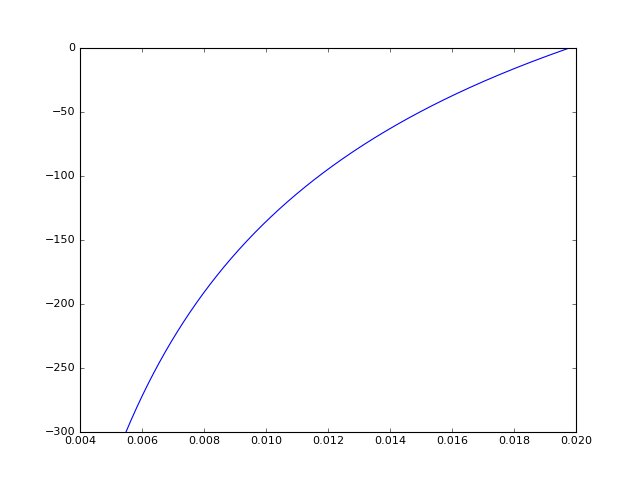

In [11]:
I=162; J=350;
omega=1.45e-4; f=1.06e-4; # tidal frequency and Coriolis parameter
Nsq=0.01**2; # buoyance

x=np.linspace(0e3,160e3,I); dx=x[1]-x[0];
 
# geometry/topography
H=225-75*np.tanh(0.1e-3*(x-70e3)); #H=300+x*0;
if 0:
    H = 0*H+225.
    ind = np.where((x>30.e3)&(x<50.e3))[0]
    H[ind] = np.linspace(225,225-75,len(ind))
    H[ind[-1]:]=225-75
#H=225.0 - 50.0*np.exp(-((x-40.e3)/1.e3)**2)
C0 = 5e-3
C1 = -3e-3

z0 = np.linspace(-np.max(H),0.,500)
Nsq0 = omega**2 + (omega**2-f**2)/(C0**2*(1+C1*z0)**4)
fig,ax=plt.subplots()
ax.plot(np.sqrt(Nsq0),z0)

In [12]:
import SolveRefl as sr
x,z,H,P,E1,psi,alpha,beta,G4,=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=x,H=H,J=J,z0=z0,Nsq0=Nsq0,)  

<IPython.core.display.Javascript object>


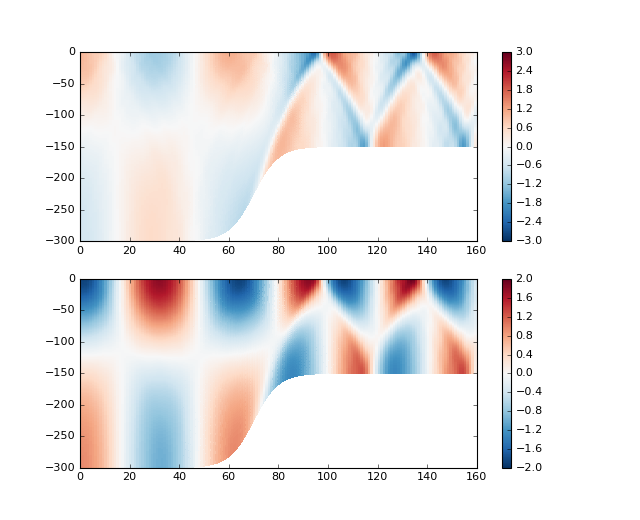

(-130393885.982-251951676.108j)
0.00285714285714
[ 1.   2.   2.5  2. ]
(350,)


In [13]:
fig,axs=plt.subplots(2,1,figsize=(8,6.5))
#P=np.real(P);
offset=np.mean(P[:,0])
print offset
dz=z[1]-z[0]
print dz
print np.gradient([1.,2.,5.,7.])
dx = x[1]-x[0]
gP = np.gradient(P)
Hx = np.gradient(H,x[1]-x[0])

print np.shape(z)
dpDX = gP[1]/dx - z[:,np.newaxis]/H*Hx*gP[0]/dz
U = -(1j*omega*dpDX)/(f**2-omega**2)
U = U-np.mean(U[:,0])
U = U/np.mean(U[-14:,0])
#for ind  in range(np.shape(U)[0]):
#    U[ind,:]=np.convolve(U[ind,:],np.ones(6)/6.,mode='same')
ax = axs[0]
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(U),rasterized=True,cmap='RdBu_r')
#symclim(pcm)
pcm.set_clim(np.array([-1,1.])*3.)
#                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
fig.colorbar(pcm,ax=ax)

ax = axs[1]
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],P-np.mean(P[:,0]),rasterized=True,cmap='RdBu_r')
symclim(pcm)
pcm.set_clim(np.array([-1.,1.])*2.)
#                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
fig.colorbar(pcm,ax=ax)


3010 3010


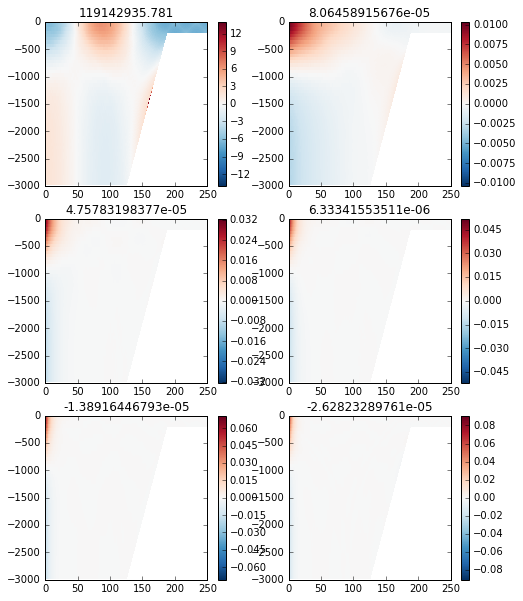

In [24]:
%matplotlib inline
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
#Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(12,figsize=(8,10))
fig.clf()

for nn,kk in enumerate(np.linspace(0.,2.e-4,6)):
    ax=fig.add_subplot(3,2,nn+1)
    I = 250
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+3010.
    I = len(xx)
    hh[I/2:3*I/4]=np.linspace(hh[I/2],200.,I/4)
    hh[3*I/4:]=200.
    f = 1.e-4
    omega = np.pi*2./12.4/3600.

    out=sr.SolveRefl(k=kk,omega=omega,f=f,wall=True,x=xx,H=hh,J=50,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    #x,z,H,P,pin1,alpha,beta,G4,
    x = out[0];z=out[1];H = out[2];P=out[3]
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r',
                     )#,vmax=1.0, vmin=-1.0)
    symclim(pcm)
    fig.colorbar(pcm,ax=ax)
    ax.set_title(offset)
    ax.set_xlim([0.,np.max(x)/1e3])
#fig.canvas.manager.show()


In [16]:
#f=1e-4
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3500.,0.,1.)
Nsq0 = 2.7e-5*np.exp(z0/1300.)

x,z,H,P=sr.SolveRefl(k=0.638e-4,omega=0.75*f,f=f,wall=True,x=xmod,H=h,J=30*2,z0=z0,Nsq0=Nsq0)
fig,ax=plt.subplots()
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*h[np.newaxis,:],P,rasterized=True,cmap='RdBu_r')
symclim(pcm)
#pcm.set_clim(np.array([-2000,2000])*10)
fig.colorbar(pcm,ax=ax)

NameError: name 'xmod' is not defined

In [692]:
print alpha[0]

NameError: name 'alpha' is not defined

## Get linear response

Compicated because the peaks are not always trivial to see...

In [9]:
ks = np.linspace(0,1.03,100)
ks = ks[1:]*1e-4
f=9.3e-5
oms = np.linspace(0.,2.03,51)*f
oms = np.array([0.2,0.75])*f
oms=oms[1:]

resp = []
for numb,hin in enumerate([0]):
    resp.append(np.zeros((len(oms),len(ks))))
    for m,omega in enumerate(oms):
        print m
        for n,k in enumerate(ks):
            Hin=h
            x,z,H,P=SolveRefl(k=k,omega=omega,f=f,wall=True,x=xmod,H=h,J=60,z0=z0,Nsq0=Nsq0)
            res=1.e-99
            for num,dt in enumerate(np.linspace(0.,np.pi,100)):
                ind = np.where(x>60e3)[0]
                re=np.mean(np.abs(np.real(P[:,ind]*np.exp(1j*dt)))*H[np.newaxis,ind])
                if re>res:
                    res=re
            resp[numb][m,n]=res


0


<IPython.core.display.Javascript object>


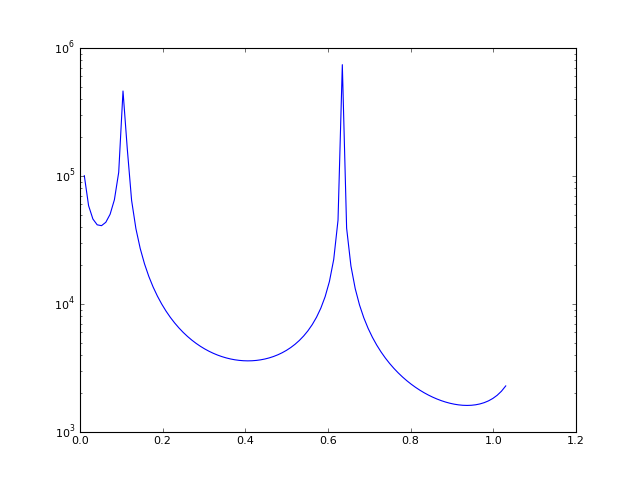

In [10]:
fig,ax = plt.subplots()
ax.semilogy(ks*1e4,resp[0][0,:])